# 6.5 pyspark编程


In [ ]:
# 本例题为朝乐门的《数据科学理论与实践》（清华大学出版社，2017）P217中的SparkR编程的Python语言版本。版权所有，转载请注明出处。

## （1）导入pyspark包

In [1]:
# pip install pyspark
# 从spark.sql模块中导入SparkSession
from pyspark.sql import SparkSession


## （2）创建SparkSession会话

In [2]:
# 实例化一个SparkSession，用于连接Spark集群
# app名中不要带空格，否则会出错
# 此处以本地模式加载集群
spark = SparkSession.builder\
    .appName('My_App')\
    .master('local')\
    .getOrCreate()

## （3）读入数据，创建Spark数据框

In [5]:
# 读入数据，创建Spark弹性式分布数据集数据框（DataFrame）
df = spark.read.csv('flights.csv', header=True)

## （4）显示DataFrame的模式信息

In [4]:
# 查看数据框结构
df.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



## （5）缓存DataFrame

In [7]:
# DataFrame对象的cache()方法，可缓存的数据框
# 对应的存储级别默认为MEMORY_AND_DISK
# DataFrame的缓存仅有默认级别

df.cache()

DataFrame[year: string, month: string, day: string, dep_time: string, dep_delay: string, arr_time: string, arr_delay: string, carrier: string, tailnum: string, flight: string, origin: string, dest: string, air_time: string, distance: string, hour: string, minute: string]

## （6）显示DataFrame的内容

In [6]:
# DataFrame对象的show方法用于查看数据框的内容
# 查看前5条记录
df.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    1|  1|       1|       96|     235|       70|     AS| N508AS|   145|   PDX| ANC|     194|    1542|   0|     1|
|2014|    1|  1|       4|       -6|     738|      -23|     US| N195UW|  1830|   SEA| CLT|     252|    2279|   0|     4|
|2014|    1|  1|       8|       13|     548|       -4|     UA| N37422|  1609|   PDX| IAH|     201|    1825|   0|     8|
|2014|    1|  1|      28|       -2|     800|      -23|     US| N547UW|   466|   PDX| CLT|     251|    2282|   0|    28|
|2014|    1|  1|      34|       44|     325|       43|     AS| N762AS|   121|   SEA| ANC|     201|    1448|   0|    34|
+----+-----+---+--------+---------+-----

## （7）显示DataFrame的列名

In [8]:
# DataFrame对象的columns属性可查看数据框的列名
# 但此属性不可修改
df.columns

['year',
 'month',
 'day',
 'dep_time',
 'dep_delay',
 'arr_time',
 'arr_delay',
 'carrier',
 'tailnum',
 'flight',
 'origin',
 'dest',
 'air_time',
 'distance',
 'hour',
 'minute']

## （8）统计DataFrame的行数

In [9]:
# DataFrame对象的count方法用于统计数据框的行数
df.count()

52535

## （9）选择数据框的特定列

In [10]:
# DataFrame对象的select方法用于选择数据框特定的列
spark_df_flights_selected = df.select(df['tailnum'], df['flight'],
                                      df['dest'], df['arr_delay'],
                                      df['dep_delay'])
# 查看选择数据的前三条信息
spark_df_flights_selected.show(3)

+-------+------+----+---------+---------+
|tailnum|flight|dest|arr_delay|dep_delay|
+-------+------+----+---------+---------+
| N508AS|   145| ANC|       70|       96|
| N195UW|  1830| CLT|      -23|       -6|
| N37422|  1609| IAH|       -4|       13|
+-------+------+----+---------+---------+
only showing top 3 rows



## （10）注册DataFrame为临时视图

In [11]:
# DataFrame对象的createGlobalTempView方法可将数据框注册为临时视图对象
# 该方法的参数即为临时视图的名称
df.createTempView('flights_view')

## （11）编写并执行SQL语句

In [12]:
# 可使用SparkSession对象（本教程中为spark）的sql方法做SQl查询

# 构造一个SQL语句
sql_str = 'select dest, arr_delay from flights_view'

# 执行SQL语句
spark_destDF = spark.sql(sql_str)

# 查看查询结果的内容
spark_destDF.show(3)

+----+---------+
|dest|arr_delay|
+----+---------+
| ANC|       70|
| CLT|      -23|
| IAH|       -4|
+----+---------+
only showing top 3 rows



## （12）将Spark SQl结果写入硬盘

In [28]:
# DataFrame对象的write.csv方法将数据框保存为csv文件
# 此处会新建一个Output_spark_destDF目录，
# 并在其下存储csv文件， 类似HDFS的存储
spark_destDF.write.csv('Output_spark_destDF1')

Py4JJavaError: An error occurred while calling o325.csv.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply$mcV$sp(FileFormatWriter.scala:215)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply(FileFormatWriter.scala:173)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply(FileFormatWriter.scala:173)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:173)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:145)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:58)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:56)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.doExecute(commands.scala:74)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:117)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:117)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:138)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:135)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:116)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:92)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:92)
	at org.apache.spark.sql.execution.datasources.DataSource.writeInFileFormat(DataSource.scala:438)
	at org.apache.spark.sql.execution.datasources.DataSource.write(DataSource.scala:474)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:48)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:58)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:56)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.doExecute(commands.scala:74)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:117)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:117)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:138)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:135)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:116)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:92)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:92)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:610)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:233)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:217)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:598)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.lang.IllegalStateException: SparkContext has been shutdown
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2014)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$$anonfun$write$1.apply$mcV$sp(FileFormatWriter.scala:188)
	... 45 more


## （13）读取已保存的Spark SQl语句结果

In [14]:
# SparkSession对象的read.csv方法将csv文件读取为弹性式分布的DataFrame
dfnew = spark.read.csv('Output_spark_destDF/part-00000-93c4c3fd-487d-4660-92e7-9f42363e6787-c000.csv')

# 查看DataFrame对象的内容
dfnew.show(3)

AnalysisException: 'Path does not exist: file:/C:/Users/soloman/clm/Output_spark_destDF/part-00000-93c4c3fd-487d-4660-92e7-9f42363e6787-c000.csv;'

## （14）过滤DataFrame的行

In [17]:
# DataFrame对象的filter方法用于筛选数据框中的行
jfkDF = df.filter(df['dest'] == 'JFK')
jfkDF.show(3)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    1|  1|     654|       -6|    1455|      -10|     DL| N686DA|   418|   SEA| JFK|     273|    2422|   6|    54|
|2014|    1|  1|     708|       -7|    1510|      -19|     AA| N3DNAA|   236|   SEA| JFK|     281|    2422|   7|     8|
|2014|    1|  1|     708|       -2|    1453|      -20|     DL| N3772H|  2258|   PDX| JFK|     267|    2454|   7|     8|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
only showing top 3 rows



## （15）分组统计Spark数据框

In [19]:
# 使用DataFrame对象的groupBy方法实现分组统计，agg方法实现聚合
# groupBy方法接受一个列为参数，作为分组依据
# agg方法接受一个字典作为参数，一个键值对对应一个列的操作
# 键（key）表示待聚合的列的类名
# 值（value）表示聚合使用的方法
dailyDelayDF = df.groupBy(df.day)\
                 .agg({'dep_delay': 'mean', 'arr_delay':'mean'})

# 使用DataFrame对象的show方法显示数据框的内容,
# 从显示结果可以看出，计算结果为“所有航班的每日平均延误起飞时间和每日平均延误降落
dailyDelayDF.show()

# 查看数据框模式信息
dailyDelayDF.printSchema()

+---+--------------------+------------------+
|day|      avg(arr_delay)|    avg(dep_delay)|
+---+--------------------+------------------+
|  7|0.025215252152521524| 5.243243243243243|
| 15|  1.0819155639571518| 4.818353236957888|
| 11|   5.749170537491706| 7.250661375661376|
| 29|   6.407451923076923| 11.32174955062912|
|  3|   5.629350893697084|11.526241799437676|
| 30|   9.433526011560694| 12.31663788140472|
|  8|    0.52455919395466| 4.555904522613066|
| 22| -1.0817571690054912|  6.10231425091352|
| 28| -3.4050632911392404| 4.110270951480781|
| 16| 0.31582125603864736|4.2917420132610005|
|  5|    4.42015503875969| 8.219989696032973|
| 31|   5.796638655462185| 6.382229673093042|
| 18|  -0.235370611183355|3.0194931773879143|
| 27|  -4.354777070063694| 4.864126984126984|
| 17|  1.8664688427299703| 5.873815165876778|
| 26| -1.5248683440608544| 4.833430742255991|
|  6|  3.1785932721712538| 7.075045759609518|
| 19|  2.8462462462462463| 7.208383233532934|
| 23|   2.352836879432624| 6.30710

## （16）重命名DataFrame数据框

In [20]:
# DataFrame对象的withwithColumnRenamed方法可实现更名
# 接受两个参数，分别为就列名和新列名
# 但需要注意的是该方法并不会直接在原数据框上进行操作，
# 而是返回一个更名后新的数据框
dailyDelayDF = dailyDelayDF.withColumnRenamed('avg(arr_delay)', 'avg_arr_delay')
dailyDelayDF = dailyDelayDF.withColumnRenamed('avg(dep_delay)', 'avg_dep_delay')
dailyDelayDF.printSchema()

root
 |-- day: string (nullable = true)
 |-- avg_arr_delay: double (nullable = true)
 |-- avg_dep_delay: double (nullable = true)



## （17）将数据转换为本地数据框

In [21]:
# DataFrame对象的toPandas方法可将弹性式分布数据框装换为本地的pandas数据框
local_dailyDelay = dailyDelayDF.toPandas()

# 查看pandas数据框前10行内容
local_dailyDelay.head(10)

,day,avg_arr_delay,avg_dep_delay
0,7,0.025215,5.243243
1,15,1.081916,4.818353
2,11,5.749171,7.250661
3,29,6.407452,11.321750
4,3,5.629351,11.526242
5,30,9.433526,12.316638
6,8,0.524559,4.555905
7,22,-1.081757,6.102314
8,28,-3.405063,4.110271
9,16,0.315821,4.291742


## （18）结果的可视化

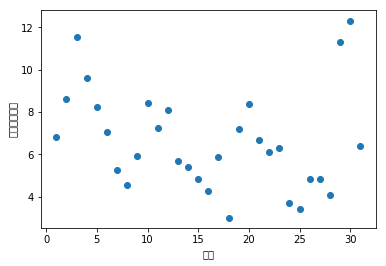

In [22]:
# 设置matplotlib绘图为行内显示，可在jupyter notebook中直接绘出图像
# 否则需调用show方法显示绘制的图像
%matplotlib inline

# 导入matplotlib包的pyplot模块，取别名为plt
import matplotlib.pyplot as plt

# 绘制“日期-起飞”散点图
# 此处将点的坐标转换为数值类型，详见numpy数组的操作
plt.scatter(local_dailyDelay.day.values.astype('i8'),
            local_dailyDelay.avg_dep_delay.astype('f8'))

# 设置轴名
plt.xlabel('日期')
plt.ylabel('起飞延误时间')

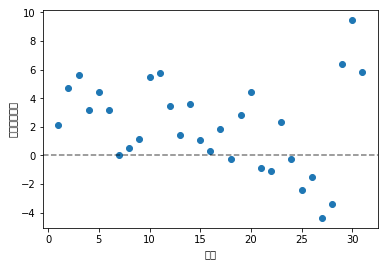

In [23]:
# 绘制“日期-到达”散点图
plt.scatter(local_dailyDelay.day.values.astype('i8'),
            local_dailyDelay.avg_arr_delay.values.astype('f8'))

# 设置轴标签
plt.xlabel('日期')
plt.ylabel('到达延误时间')

# 绘制x=0水平线
plt.axhline(0, color='black', linestyle='--', alpha=0.5)

## （18）关闭SparkSession会话

In [24]:
# 关闭SparkSession会话
spark.stop()